In [ ]:
#    By André Ivaniski Mello 
# andreivaniskimello@gmail.com
 
# 17/july/23
# Routine to process GRF Data. Calculate COP responses during APA from Weight Transfer task (Bipedal to Unipedal)
 
# Input: 
#    % .txt file array with GRF (x,y,z), Moments (x,y,z), and COP (x,y)
# Processing:
#   % Low-pass filter 
 
# Variables:
 
# COP Amplitude (x and y)
# COP Peak Speed (x and y)

# Output:
    # Excel file with the File Name; Variables


# X: AP
# Y: ML
# Z: Vertical

# COP X: AP
# COP Y: ML



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.signal import hilbert
from scipy.signal import butter, filtfilt
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
import ipywidgets as widgets
import tkinter as tk
from tkinter import simpledialog
from tkinter import Tk, simpledialog
import math
import mplcursors

In [3]:
# LOW PASS BUTTERWORTH FILTER
def butter_lowpass(cutoff, fs, order):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


#INSERT RESIDUAL ANALYSIS TO DETERMINE CUTOFF FREQUENCY (24.july.23)

def on_click(event):
    if event.button == 1:  # Check if the left mouse button is clicked
        x_coord = event.xdata
        y_coord = event.ydata
        print("Selected coordinates: X =", x_coord, "Y =", y_coord)


In [4]:
### 1. IMPORT DATA (START)

# Specify the folder path
    # Attention: separate the folder-subfolders with this slash "/" and not this "\"
folder_path = "C:/Users/andre/Documents/Andre\Pesquisa/Artigos para Publicar/TCC Vivian - Equilíbrio GRF CREM/Data/Data In"

fsample = 1000
dt = 1/fsample

# Iterate over each sheet in the Excel file
#for sheet_name in File.sheet_names: # edit this!!!!!
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        # Extract the name of the file (without the extension)
        file_name = os.path.splitext(filename)[0]

        # Construct the full path to the .c3d file
        File_Path_Name = os.path.join(folder_path, filename)
        print('Now reading:', File_Path_Name)
        #Construct the full path to Export the data from the current iteration file
        Name_Output = "C:/Users/andre/Documents/Andre\Pesquisa/Artigos para Publicar/TCC Vivian - Equilíbrio GRF CREM/Data/Data Out/" + file_name + "_COP_Output.xlsx"
        
        # Load the .c3d file
        df = pd.read_csv(File_Path_Name, delimiter='\t', header = 3)
        
        #print(df)


Now reading: C:/Users/andre/Documents/Andre\Pesquisa/Artigos para Publicar/TCC Vivian - Equilíbrio GRF CREM/Data/Data In\AdemirGO_POS2022_UP_OA_1.txt


3917


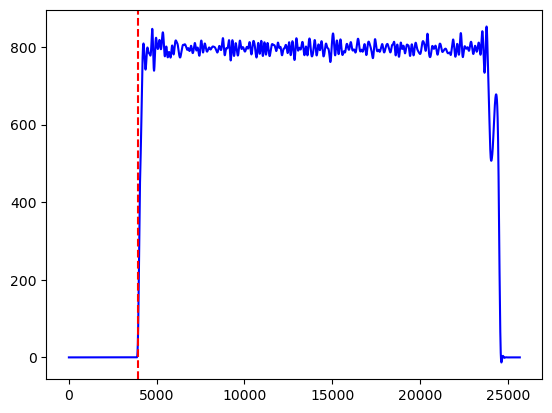

In [5]:
#print(df)
# Print the column headers
#print(df.columns.tolist())

Frames = df['Frame']
FX = df['Fx']
FY = df['Fy']
FZ = df['Fz']

MX = df['Fx']
MY = df['Fy']
MZ = df['Fz']

COPX = df['Cx']
COPY = df['Cy']
COPZ = df['Cz']

# Extract only the numeric values, without data unit header
FX = FX[1:].values
FY = FY[1:].values
FZ = FZ[1:].values

MX = MX[1:].values
MY = MY[1:].values
MZ = MZ[1:].values

COPX = COPX[1:].values
COPY = COPY[1:].values
COPZ = COPZ[1:].values

# COnverting the array to float, as it is importing as string (I do not know why)
FX = FX.astype(float)
FY = FY.astype(float)
FZ = FZ.astype(float)

MX = MX.astype(float)
MY = MY.astype(float)
MZ = MZ.astype(float)

COPX = COPX.astype(float)
COPY = COPY.astype(float)
COPZ = COPZ.astype(float)


# Low-pass filter
cutoff = 6  # Cut-off frequency for the low-pass filter
order = 4  # Order of the filter

FX = butter_lowpass_filter(FX, cutoff, fsample, order)
FY = butter_lowpass_filter(FY, cutoff, fsample, order)
FZ = butter_lowpass_filter(FZ, cutoff, fsample, order)
FZ = FZ*-1
COPX = butter_lowpass_filter(COPX, cutoff, fsample, order)
COPY = butter_lowpass_filter(COPY, cutoff, fsample, order)

# Detect when the subject get on the force platform
Threshold_FZ= []
for i in range(len(FZ)):
    if FZ[i] > 20:
        Threshold_FZ.append(i)
Threshold_FZ = Threshold_FZ[0]
print(Threshold_FZ)

# Figure of GRF Vertical
plt.plot(FZ,'b')
plt.axvline(x=Threshold_FZ, color='red', linestyle='--')

# Recort the COP curves starting with the threshold detect above
COPX = COPX[Threshold_FZ:]
COPY = COPY[Threshold_FZ:]

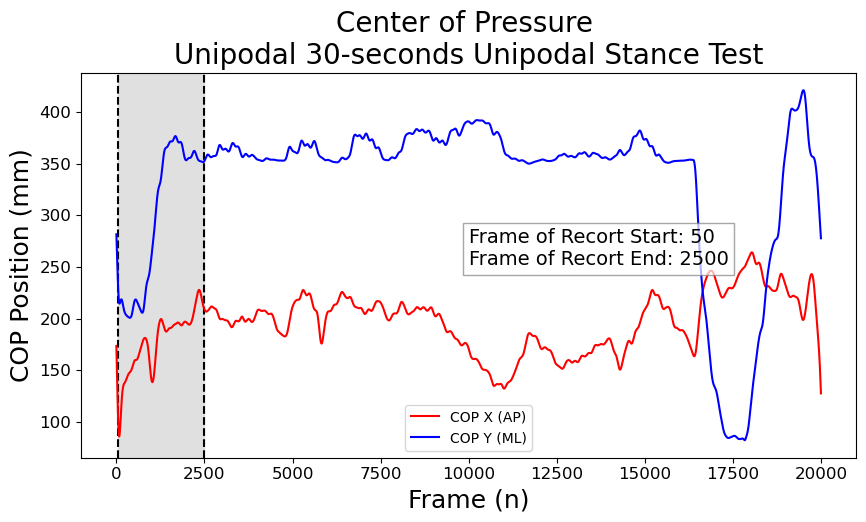

In [6]:
# Set here the Overall Recort Start and End. Verify visually in the curve if it is ok.
    # This Overall Recort is just to "zoom" into the region near the Bipodal-to-Unipodal Transition Phase

Recort_Start = 50
Recort_End = 2500

fig, ax = plt.subplots()
plt.title("Center of Pressure \nUnipodal 30-seconds Unipodal Stance Test", fontsize=20)

# Increase the figure size
width = 10
height = 5
fig.set_size_inches(width,height)  # Set the width and height of the figure in inches

plt.axvline(x=Recort_Start, color='black', linestyle='--')
plt.axvline(x=Recort_End, color='black', linestyle='--')
plt.axvspan(Recort_Start, Recort_End, color = 'lightgray', alpha = 0.7)
plt.plot(COPX[:20000],'r',label='COP X (AP)')
plt.plot(COPY[:20000],'b',label='COP Y (ML)')
# COP X: AP
# COP Y: ML

text_box = f'Frame of Recort Start: {Recort_Start:.0f} \nFrame of Recort End: {Recort_End:.0f}'
plt.text(0.5, 0.5, text_box, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7), fontsize=14)
plt.xlabel('Frame (n)', fontsize=18)
plt.ylabel('COP Position (mm)', fontsize=18)
ax.tick_params(labelsize=12)

plt.legend()



In [7]:
# Recort to zoom into the region of the Bipodal-to-Unipodal Transition Phase
COPX_Recort = COPX[Recort_Start:Recort_End]
COPY_Recort = COPY[Recort_Start:Recort_End]

# COP in m
COPX_Recort = COPX_Recort/1000
COPY_Recort = COPY_Recort/1000

# COP Speed in m/s
COPX_Speed = np.diff(COPX_Recort)/dt
COPY_Speed = np.diff(COPY_Recort)/dt

    # Low pass Butterworth filter of COP Speed
cutoff = 6
order = 4
COPX_Speed = butter_lowpass_filter(COPX_Speed, cutoff, fsample, order)
COPY_Speed = butter_lowpass_filter(COPY_Speed, cutoff, fsample, order)


# APA t0 threshold for COP Speed (Plate et al., 2016. DOI: 10.1007/s00221-016-4665-x)
    # Set as COP Speed of 0.15 m/s, in any axis (AP or ML)
APA_Threshold = 0.15

COPX_Speed_APA_Start = []
for i in range(len(COPX_Speed)):
    if COPX_Speed[i] > 0.15:
        COPX_Speed_APA_Start.append(i)
COPX_Speed_APA_Start = COPX_Speed_APA_Start[0]


COPY_Speed_APA_Start = []
for i in range(len(COPY_Speed)):
    if COPY_Speed[i] > 0.15:
        COPY_Speed_APA_Start.append(i)
COPY_Speed_APA_Start = COPY_Speed_APA_Start[0]

APA_Start = np.min([COPX_Speed_APA_Start,COPY_Speed_APA_Start])

print(COPX_Speed_APA_Start)
print(COPY_Speed_APA_Start)
print(APA_Start)

117
474
117


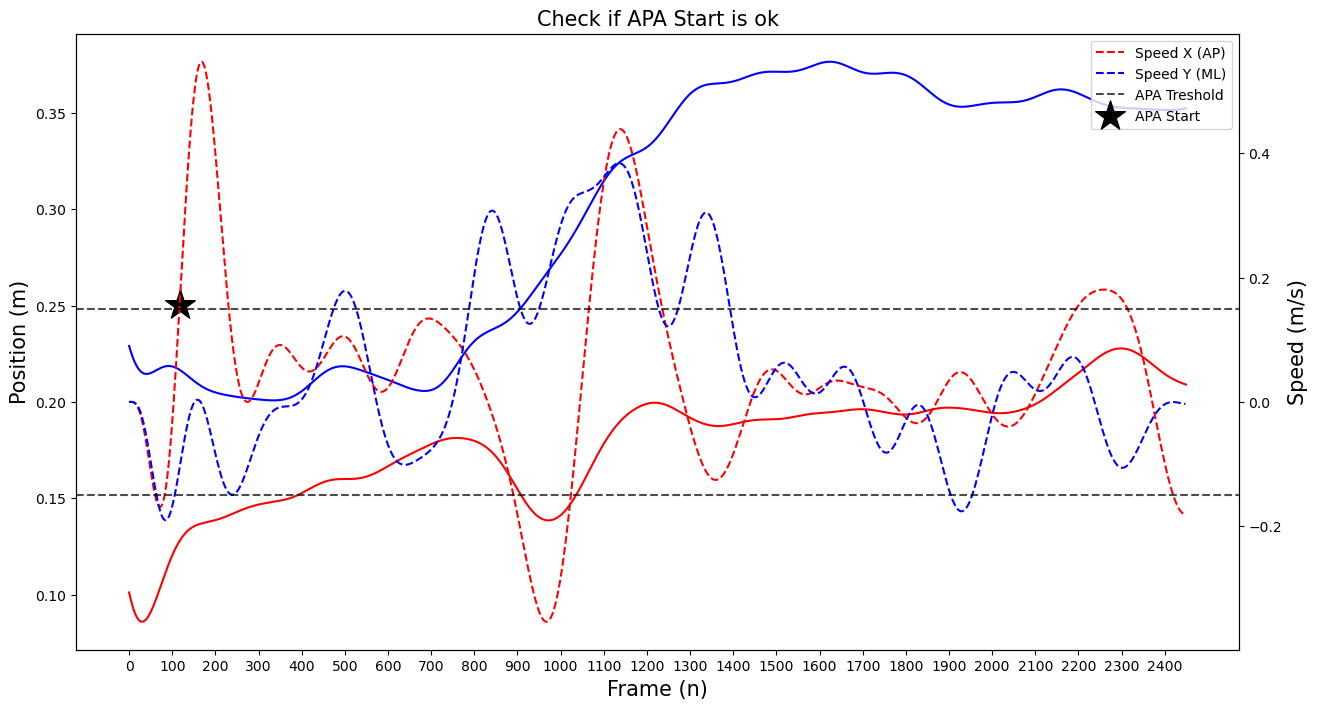

In [21]:
fig, ax1 = plt.subplots()
plt.title("Check if APA Start is ok", fontsize=15)

# Increase the figure size
width = 15
height = 8
fig.set_size_inches(width,height)

# Edit horizontal axis ticks
ax1.set_xticks(np.arange(0, len(COPX_Recort), 100))
ax1.set_xlabel('Frame (n)', fontsize=15)

# Plot COP Position (m) in First Vertical Axis
ax1.plot(COPX_Recort, 'r-',label='COP X (AP)')
ax1.plot(COPY_Recort,'b',label='COP Y (ML)')
ax1.set_ylabel('Position (m)', fontsize=15)

# Plot COP Speed (m/s)
ax2 = ax1.twinx()
ax2.plot(COPX_Speed,'r--',label='Speed X (AP)')
ax2.plot(COPY_Speed,'b--',label='Speed Y (ML)')

ax2.axhline(y=APA_Threshold, color='k',linestyle='--', label='APA Treshold', alpha=0.7)
ax2.axhline(y=-APA_Threshold, color='k',linestyle='--', alpha=0.7)
ax2.scatter(APA_Start,COPX_Speed[APA_Start], color='black', marker='*', s=500, label='APA Start')
#ax2.axvline(x=APA_Start, color='black', linestyle='--', )
ax2.set_ylabel('Speed (m/s)', fontsize=15)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

# Show the plot

plt.legend()
plt.show()


# SET HERE MANUALLY THE APA WINDOW END

In [24]:
APA_End = 1400

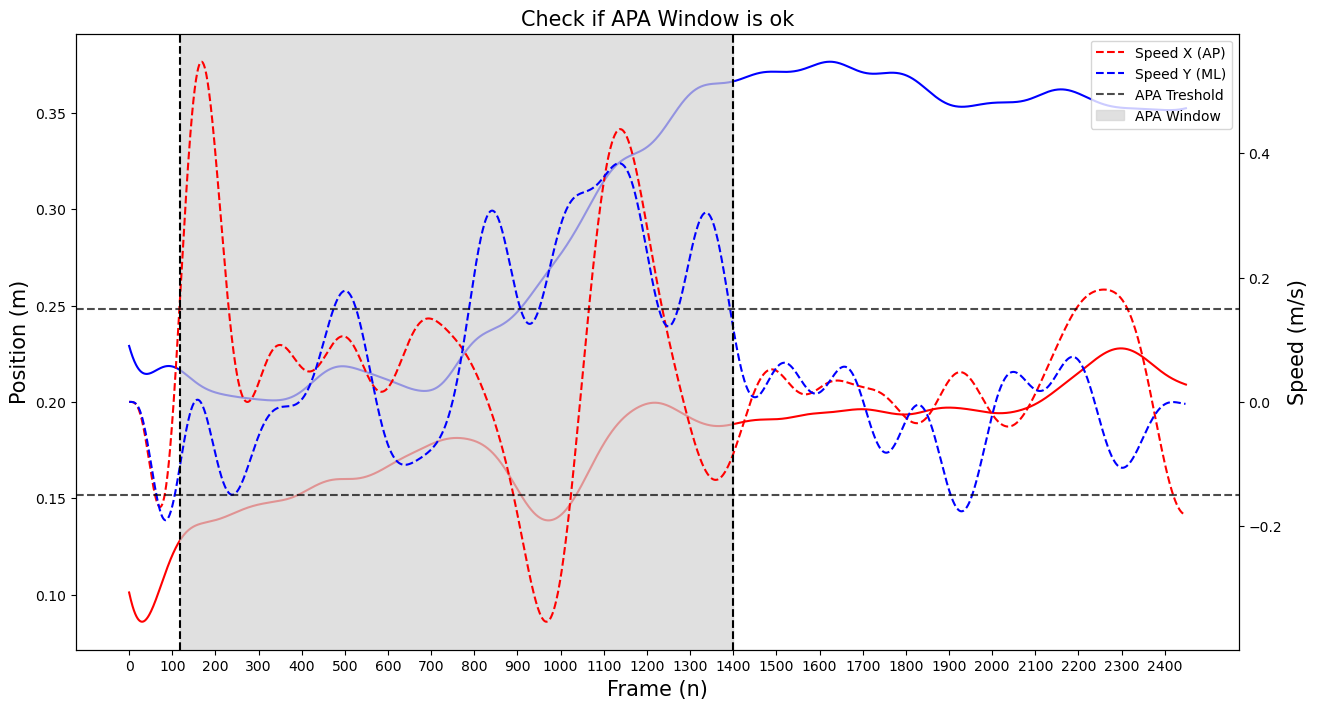

In [25]:
fig, ax1 = plt.subplots()
plt.title("Check if APA Window is ok", fontsize=15)

# Increase the figure size
width = 15
height = 8
fig.set_size_inches(width,height)

# Edit horizontal axis ticks
ax1.set_xticks(np.arange(0, len(COPX_Recort), 100))
ax1.set_xlabel('Frame (n)', fontsize=15)

# Plot COP Position (m) in First Vertical Axis
ax1.plot(COPX_Recort, 'r-',label='COP X (AP)')
ax1.plot(COPY_Recort,'b',label='COP Y (ML)')
ax1.set_ylabel('Position (m)', fontsize=15)

# Plot COP Speed (m/s)
ax2 = ax1.twinx()
ax2.plot(COPX_Speed,'r--',label='Speed X (AP)')
ax2.plot(COPY_Speed,'b--',label='Speed Y (ML)')

ax2.axhline(y=APA_Threshold, color='k',linestyle='--', label='APA Treshold', alpha=0.7)
ax2.axhline(y=-APA_Threshold, color='k',linestyle='--', alpha=0.7)

ax2.axvline(x=APA_Start, color='black', linestyle='--')
ax2.axvline(x=APA_End, color='black', linestyle='--')
plt.axvspan(APA_Start, APA_End, color = 'lightgray', alpha = 0.7, label='APA Window')

ax2.set_ylabel('Speed (m/s)', fontsize=15)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

# Show the plot

plt.legend()
plt.show()

In [26]:
# Recort APA Window
COPX_APAWindow = COPX_Recort[APA_Start:APA_End]
COPY_APAWindow = COPY_Recort[APA_Start:APA_End]
COPX_Speed_APAWindow = COPX_Speed[APA_Start:APA_End]
COPY_Speed_APAWindow = COPY_Speed[APA_Start:APA_End]


# Calculate the COP Position Amplitude (Max - Min) and Peak Speed (Max)
COPY_Amplitude = np.max(COPY_APAWindow) - np.min(COPY_APAWindow)
COPY_Speed_Peak = np.max(COPY_Speed_APAWindow)

COPX_Amplitude = np.max(COPX_APAWindow) - np.min(COPX_APAWindow)
COPX_Speed_Peak = np.max(COPX_Speed_APAWindow)

In [27]:
Export_Data = {'file_name': file_name,'COPX Amplitued (m)':COPX_Amplitude,'COPY Amplitued (m)':COPY_Amplitude, 'COPX_Speed_Peak (m/s)':COPX_Speed_Peak, 'COPY_Speed_Peak (m/s)':COPY_Speed_Peak}
df_Export_Data = pd.DataFrame(Export_Data, index=[0])
df_Export_Data.to_excel(Name_Output, index=False)

# COP APA DETECTION METHOD (imported from Matlab script, I have to adjust for Python language) 24.july.23